In [1]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import math
from scipy import stats
from sklearn import linear_model
from src.utils.analysis_movies_function import extract_us_nonus, get_all_genre,  get_movies_genre_change, plot_movies_genre_change, plot_percentage_movies_genre_all, linear_regression_plot, plot_per_continent,continent_data, create_world_map, plot_continent, get_propaganda_movies
from src.utils.analysis_plots_function import count_key_words, plot_key_words_occ, percentage_key_words_before_after, plot_key_words_occ_zoomed


# Loading the data

All the raw data preprocessing, and basic analysis can be found in the jupyter notebook `src/utils/preprocessing.ipynb`. 
In the preprocessing, we did several things: 
- We removed outliers from the dataset (example: a movie with several years of runtime...)
- We transformed data in a more useful way (example: string date to datetime, dict to list...)
- We added new columns from the existing ones and infered some values based on the majority of the data 
- We matched the cleaned ethnicity ID with another dataset to get meaningful ethnicities 

The raw datasets are in `/src/data` and the cleaned and formated datasets are then saved as pkl files in `/data`

In [2]:
movies = pd.read_pickle('data/movies.pkl')
tvtropes = pd.read_pickle('data/tvtropes.pkl')
plot_summaries = pd.read_pickle('data/plot_summaries.pkl')

# World War 2

### Genre analysis

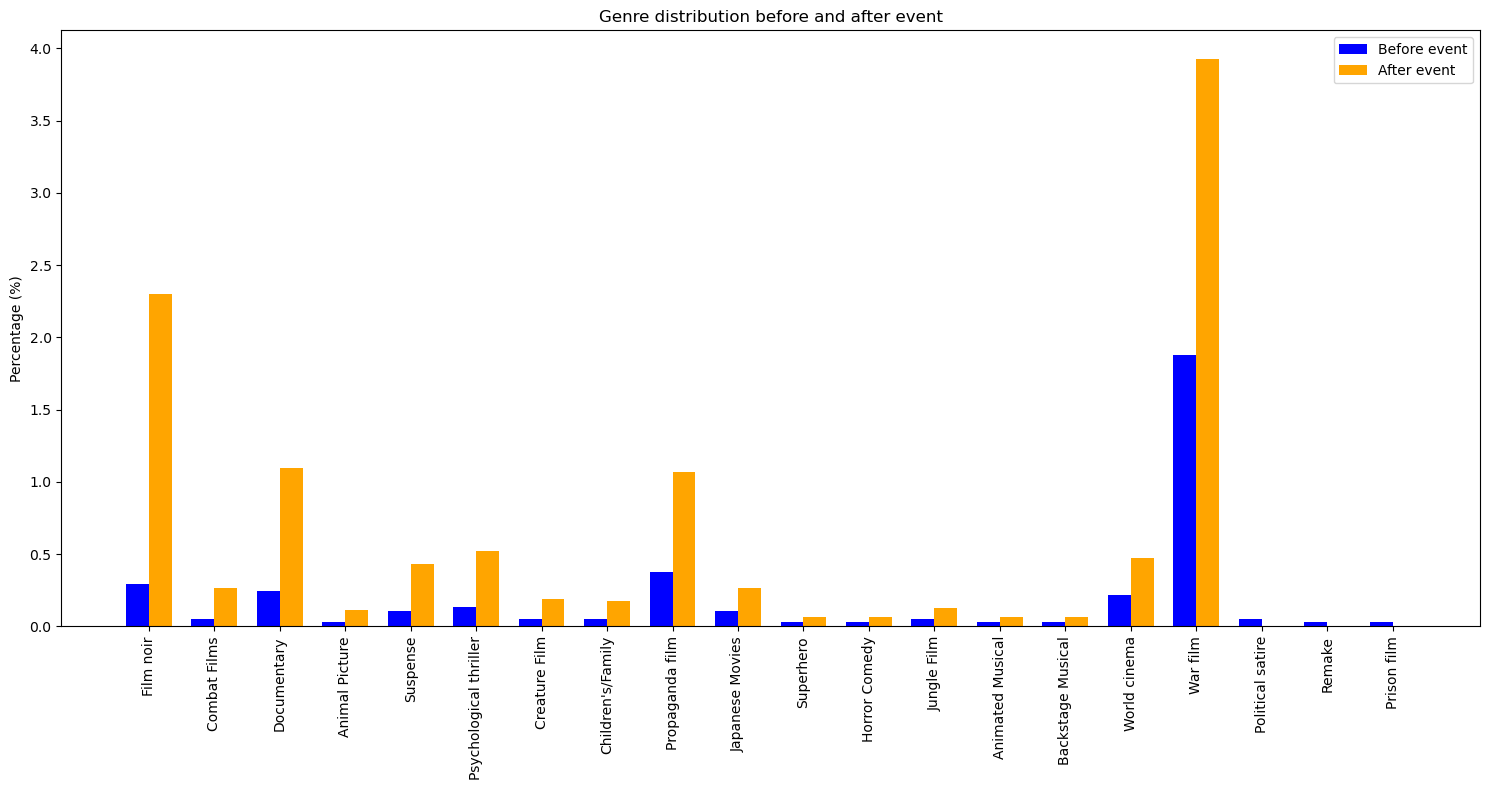

t-statistic: -1.5770577208923913
p-value: 0.12307189423725653


In [3]:
# get the list of all genres 
genres_unique = get_all_genre(movies)

# extract the genre percentage for the period between 1937 - 1941 and the period between 1937 - 1948 and sort them by the highest change
df = get_movies_genre_change(movies, genres_unique, 20, 1937,  1941,1948)
plot_movies_genre_change(df)

#stastistical analysis of the change
t_statistic, p_value = stats.ttest_ind(df.count_before, df.count_after)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

There is no significant difference between the two period.
From the list of 20 most varying genre we select the ones that might be linked to word war 2 in a list below.

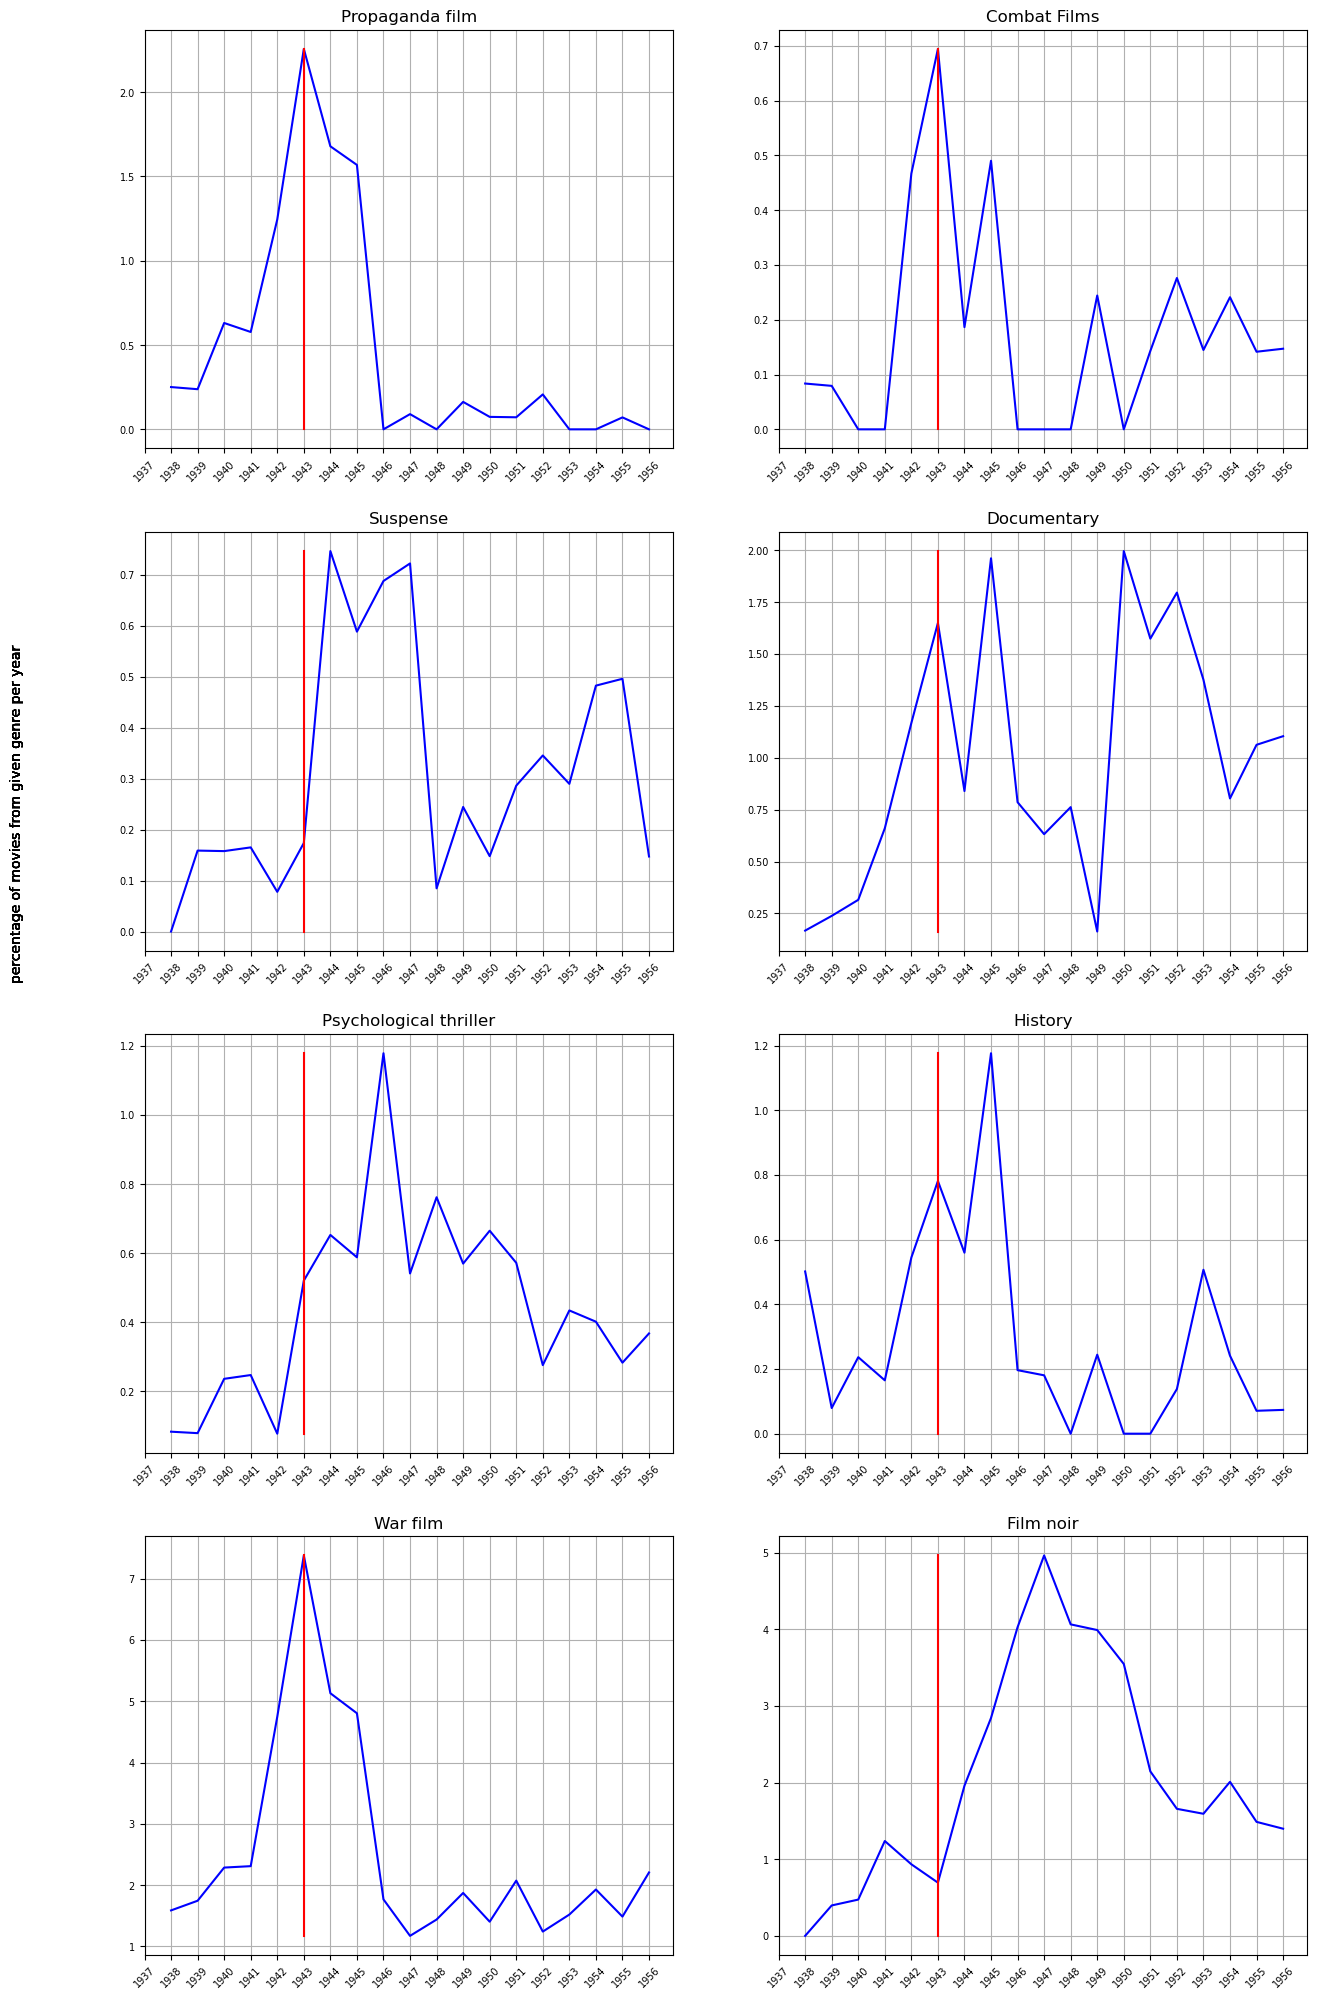

In [4]:
selected_genres = ['Propaganda film', 'Combat Films', 'Suspense', 'Documentary', 'Psychological thriller', 'History','War film', 'Film noir']

#time serie of the selected genre evolution
plot_percentage_movies_genre_all(movies,selected_genres,1937, 1957, 1943,4,2)

We observe that for the 10 selected genres, there is a noticeable peak in the percentage of certain genres around the Second World War. Following this period, the percentage returns to its initial values. This pattern is evident for genres such as propaganda films, war films, and historical films. Other genres, like film noir and suspense films, experienced a later and more prolonged impact. Documentary films exhibit two distinct peaks.

To have a more precise analysis, we would like to analyse the trends per continent. We will focus on Asia, Europe and North America. Is the whole world impacted the same way?

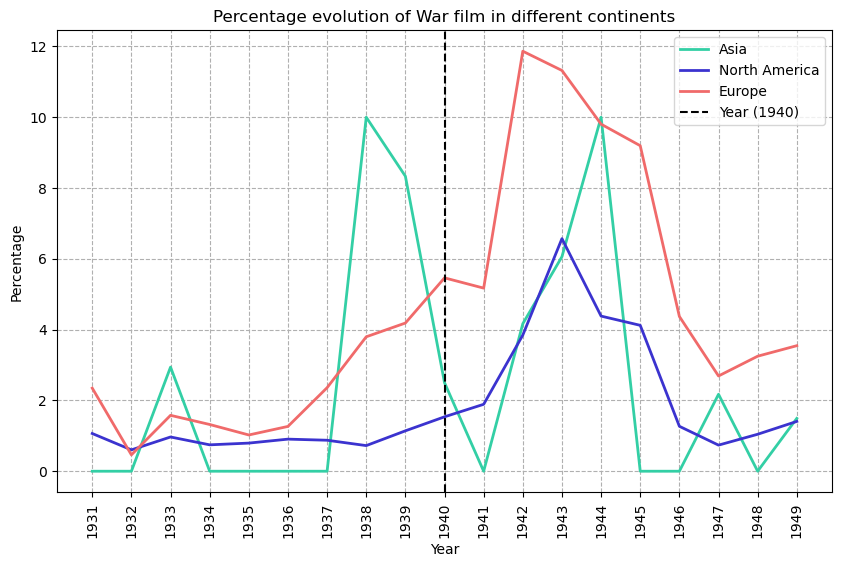

In [5]:
plot_continent(movies, 1930, 1950, 1940, 'War film')


For war films, we notice a change in the percentage of this genre across all continents. A similar trend occurs in the US, Europe, and Asia. We can observe that in Europe, the tendency for war-themed movies started increasing quite early. In Asia, there is an initial peak occurring before the other continents, which might be linked to the Second Sino-Japanese War that started in 1937.

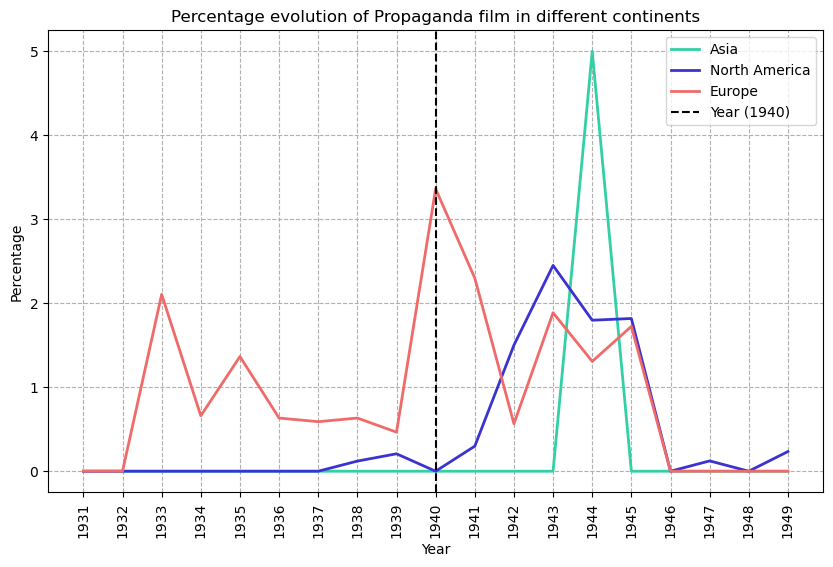

In [6]:
plot_continent(movies, 1930, 1950, 1940, 'Propaganda film')


Propaganda films shows a similar trend, with a peak around 1943 for both the US and Asia. We can also observe that Europe has a unique pattern, with a generally higher share of propaganda movies and a peak in 1940. To further analyze this, we will focus on German propaganda movies compared to the rest of Europe.

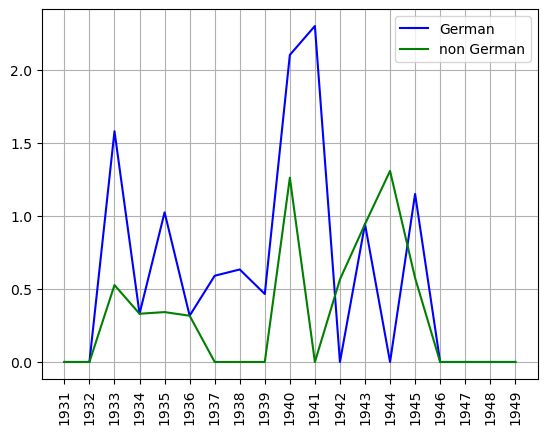

In [7]:
get_propaganda_movies(movies, 1930, 1950, 1940, 'Propaganda film')


We observe that Germany dominates the propaganda film market, releasing more movies than the rest of the European countries (except towards the end, where the trend changes). The peak noted earlier is primarily due to Germany's contribution.

# 9/11

In [8]:
#split US movies from non US ones 
us_movies,nonus_movies = extract_us_nonus(movies)

#All genres in dataset
genres_unique = get_all_genre(movies)

### US movies

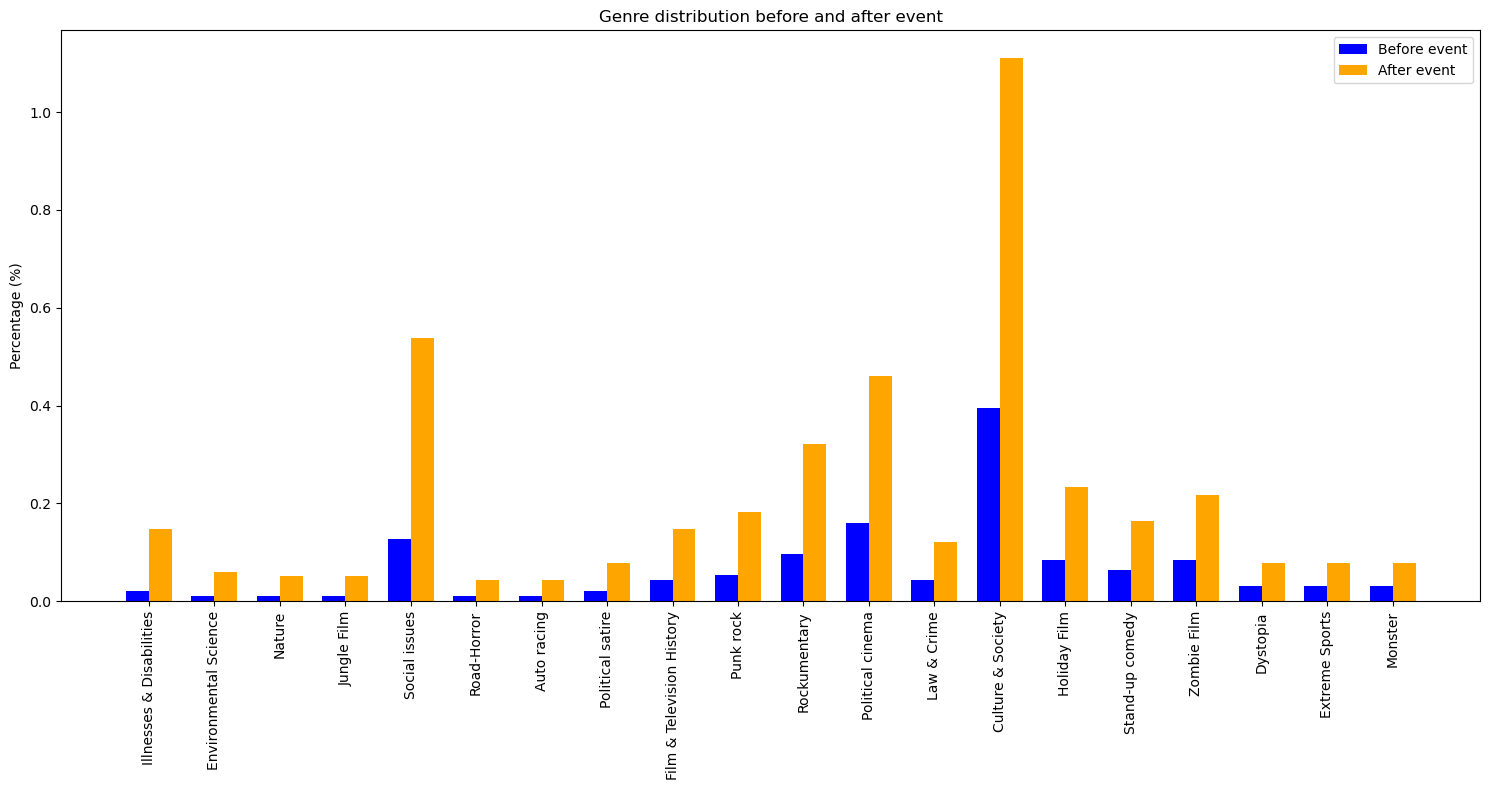

t-statistic: -2.3999224911889345
p-value: 0.021405089343880673


In [9]:
#to get the genre the most impacted, we will choose a small time range to limit cofounding factors
df = get_movies_genre_change(us_movies, genres_unique, 20, 1997,  2002,2006)
plot_movies_genre_change(df)
t_statistic, p_value = stats.ttest_ind(df.count_before, df.count_after)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

for the 20 genres the most changing, there is a significant difference 

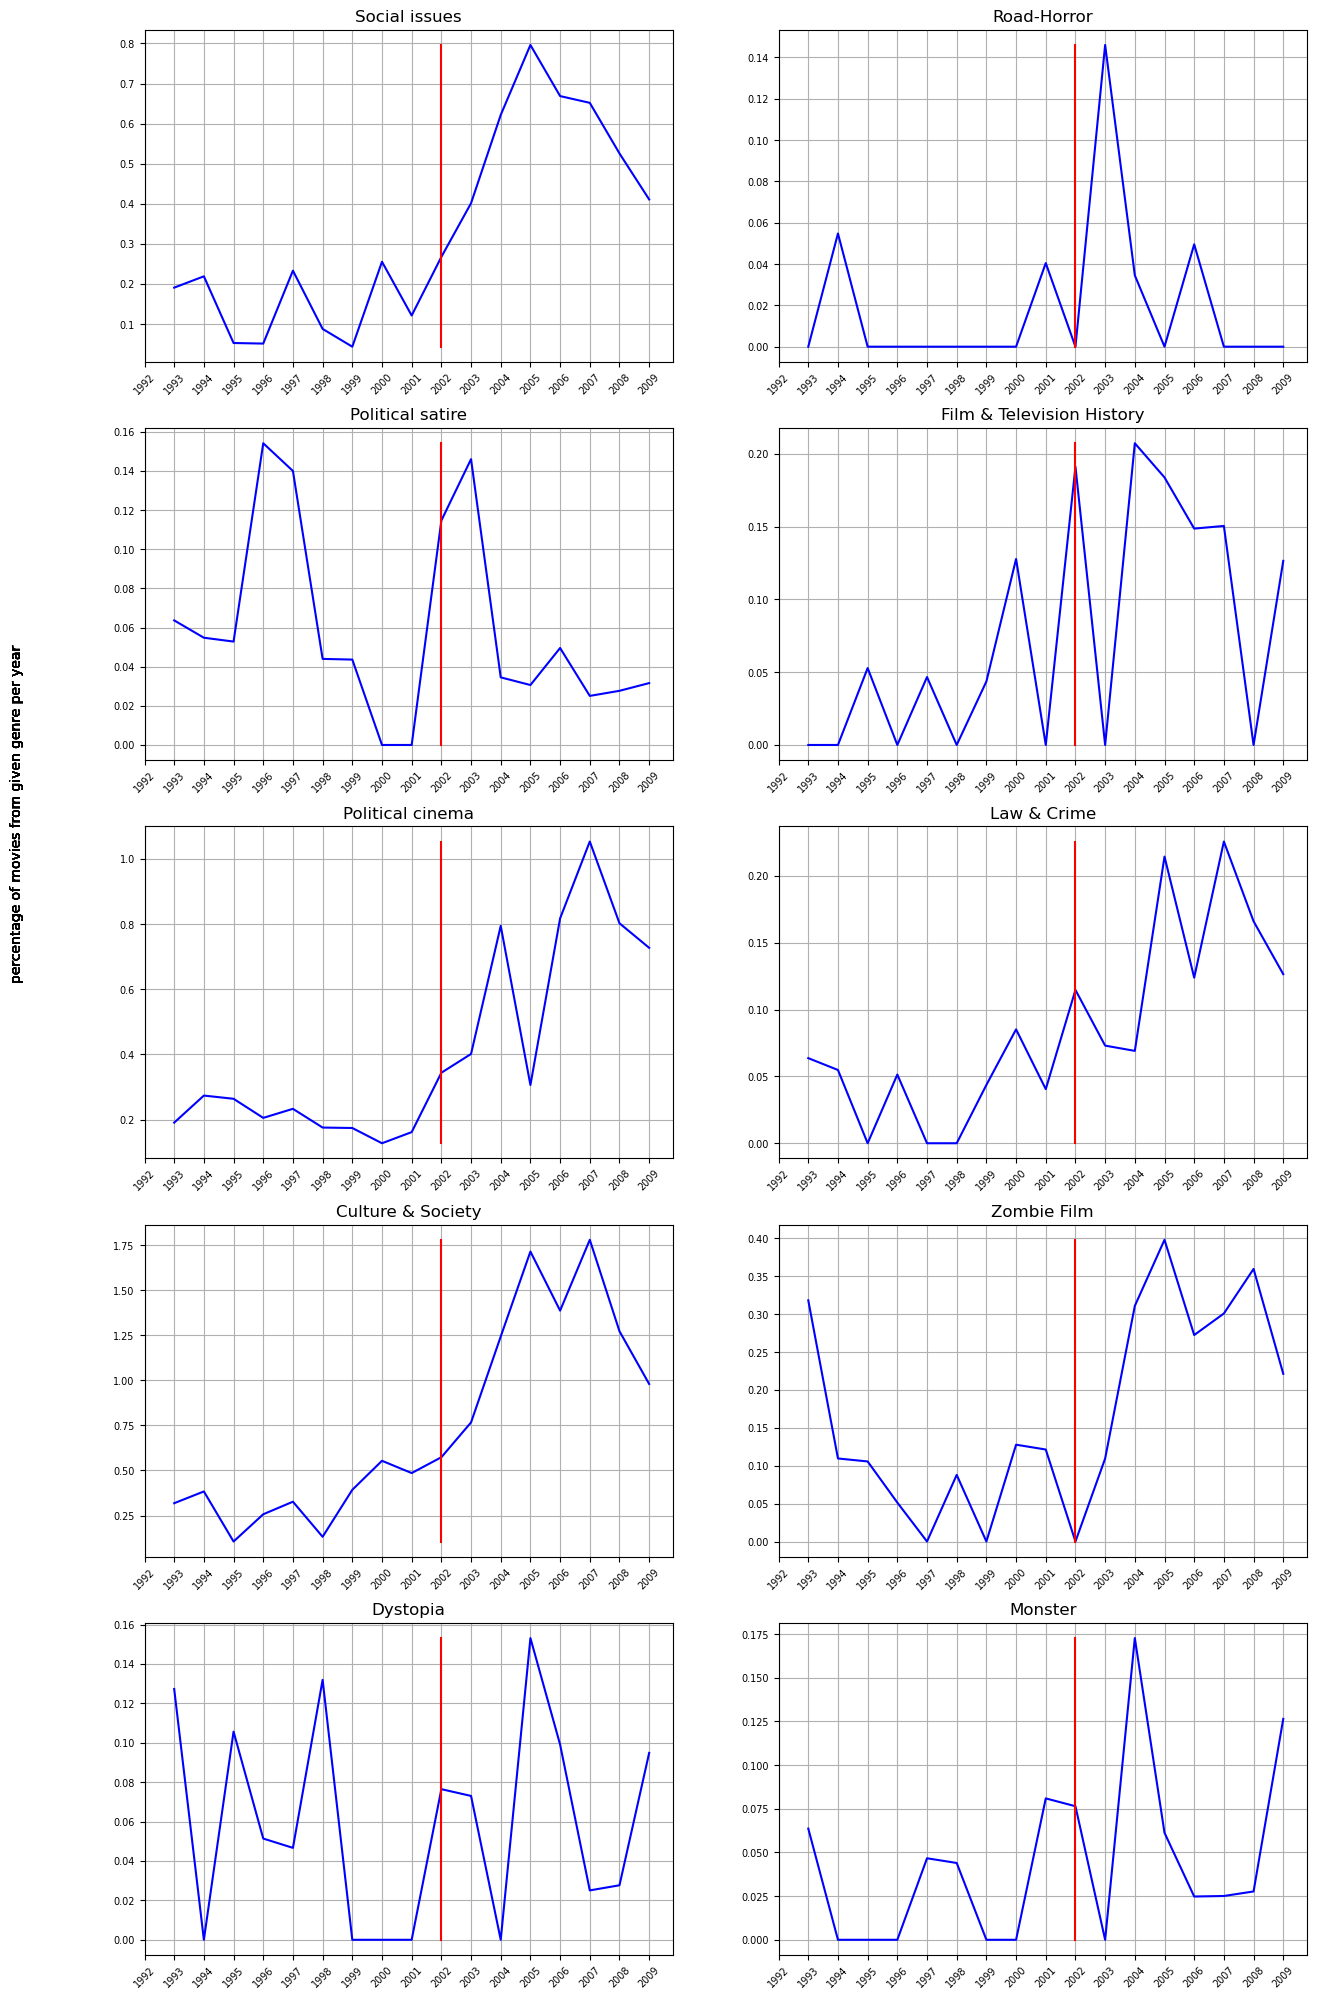

In [10]:
# from these 20 genres we focus on the ones linked to politics and social 
genres = ['Social issues', 'Road-Horror','Political satire', 'Film & Television History','Political cinema', 'Law & Crime',
       'Culture & Society','Zombie Film', 'Dystopia', 'Monster']

plot_percentage_movies_genre_all(us_movies,genres,1992, 2010, 2002,5,2)


We notice an upward trend in the social issues genre after 2002. A similar pattern appears in political cinema, where the trend shifts from a decrease to an increase. Additionally, the road horror genre shows a peak after 2002

###  Non US movies

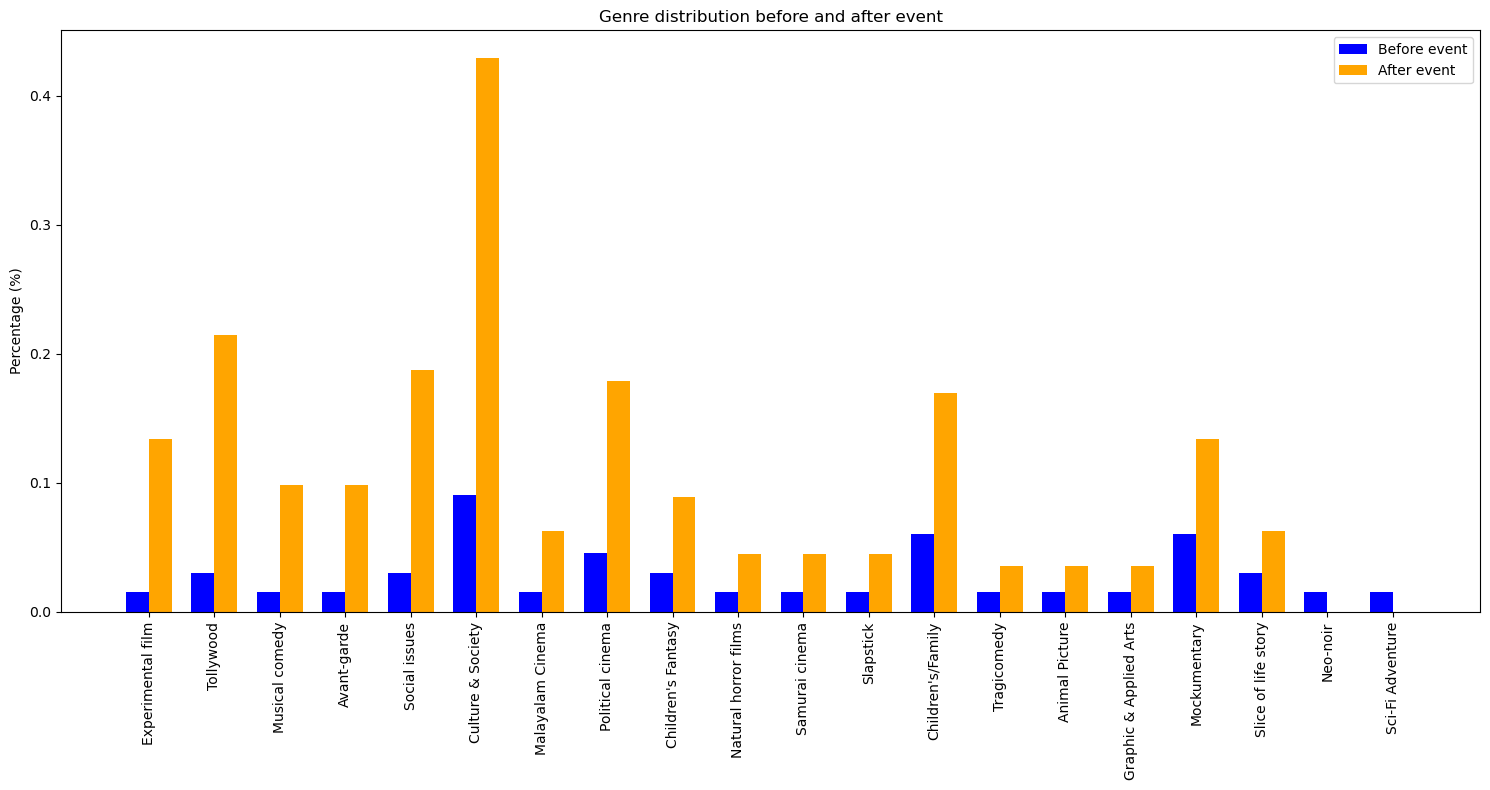

In [11]:
df = get_movies_genre_change(nonus_movies, genres_unique, 20, 1997,  2002,2006)
plot_movies_genre_change(df)

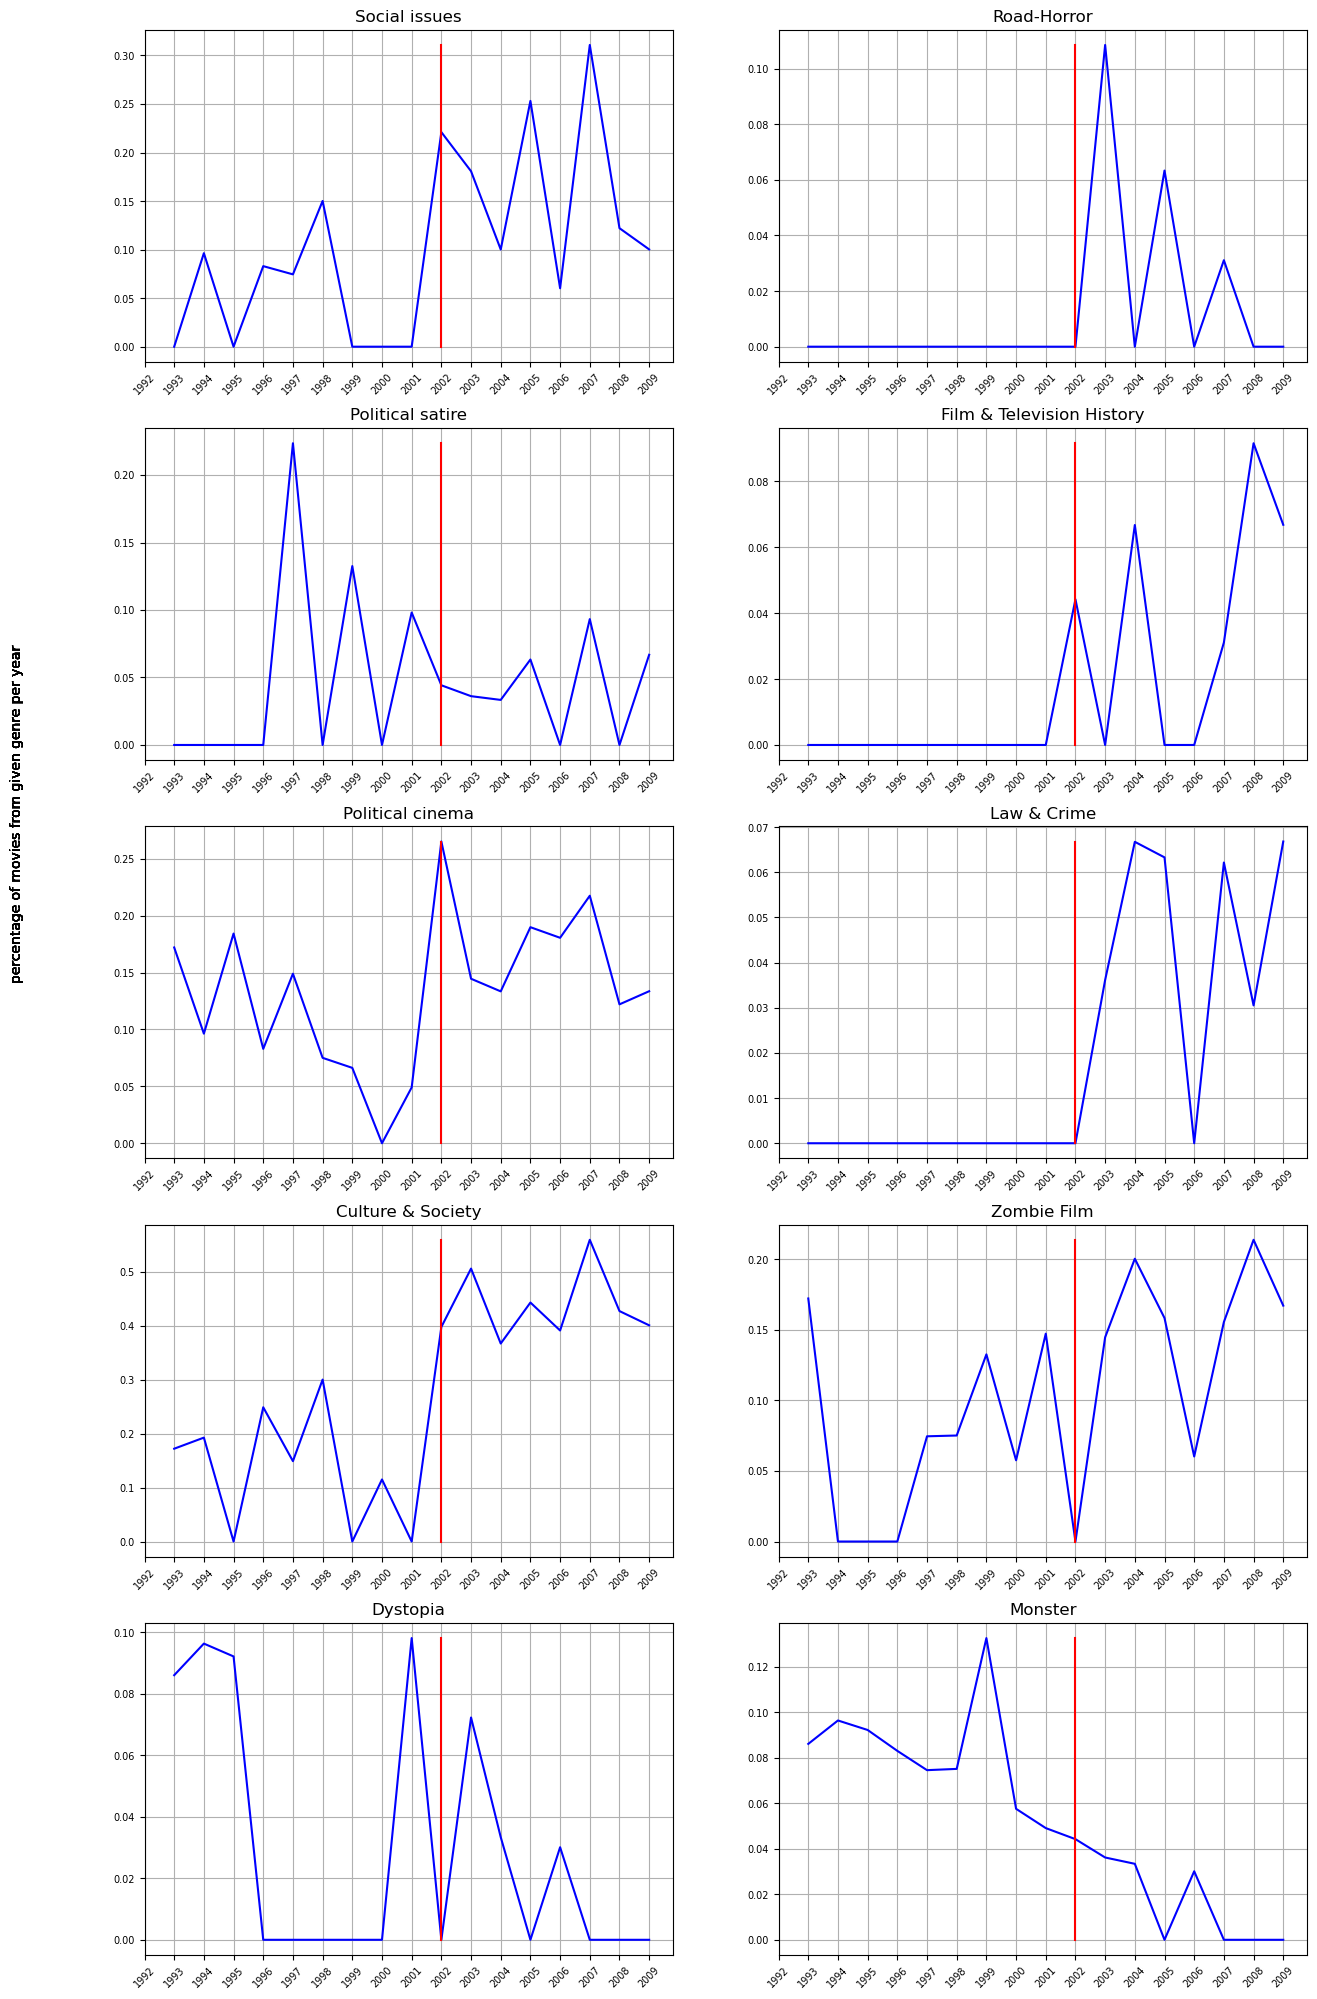

In [12]:
plot_percentage_movies_genre_all(nonus_movies,genres,1992, 2010, 2002,5,2)

We observe that the 20 genres with the highest changes are not completely identical between the U.S. and the rest of the world. Additionally, examining the time series for each genre studied in the U.S., we see that genres like political cinema, for example, show different trends in variation when compared to their counterparts outside the U.S.

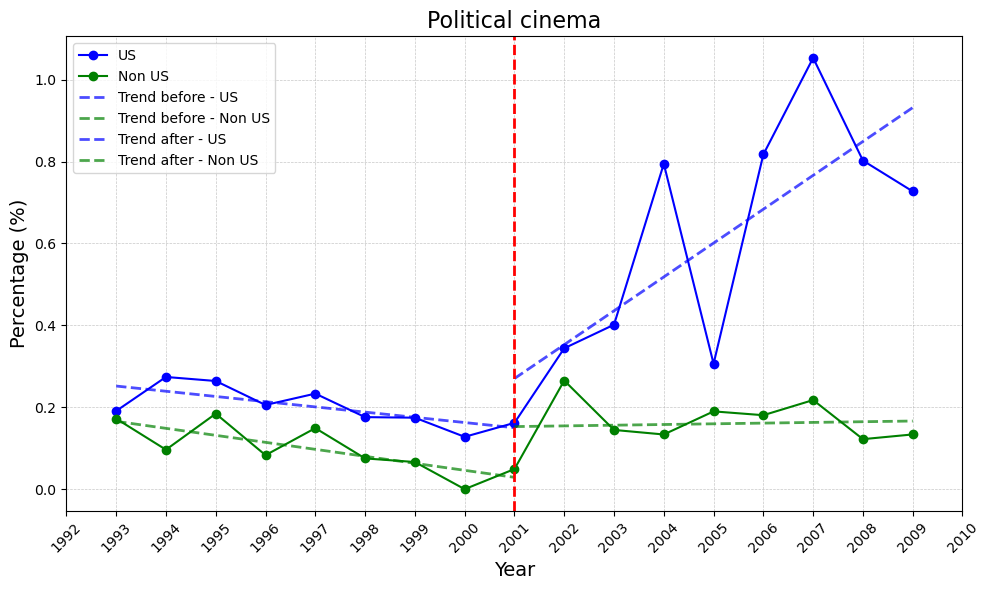

In [13]:
linear_regression_plot(us_movies, nonus_movies, 1992,2010,2001,"Political cinema" )

We notice a change in the trend of US political cinema, with the linear regression shifting from a slightly negative slope to a positive one. In contrast, for the rest of the world, there is no change in the trend, but only a difference in the intercept. We will focus more on a continent level analysis for this genre.

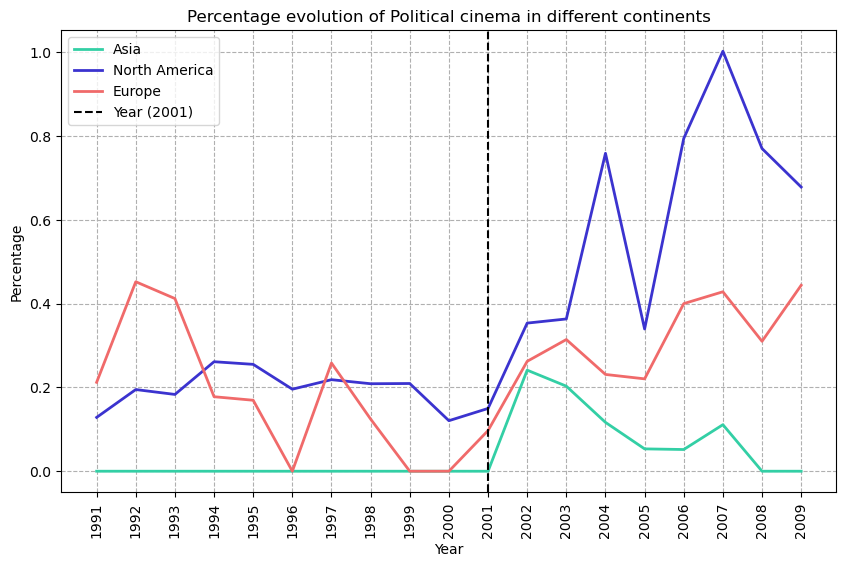

In [14]:
plot_continent(movies, 1990, 2010,  2001, 'Political cinema')


Both Europe and North America show an increasing trend in the political cinema genre with a more significant increase in North America compared to Europe. This shift might be linked to the events of 9/11. In response, cinema began to reflect themes of terrorism, national security, and state surveillance that are part of the political cinema genre. In Asia, there is a peak followed by a decrease in political cinema output.